# 1. Image Negative

In [18]:
from PIL import Image
import numpy as np

# Load the image
image = Image.open("images/image1.jpeg")

In [19]:
# convert to grayscale if the image isn't grayscale
if image.mode == "RGB":
    image = image.convert("L")

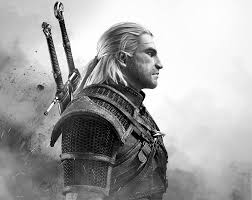

In [20]:
image

In [21]:
# get the image data
pixels = list(image.getdata())

In [6]:
pixels[:10]

[190, 190, 190, 190, 190, 190, 190, 190, 190, 191]

In [7]:
# Apply the negative effect
negative_pixels = [(255 - pixel) for pixel in pixels]

In [8]:
negative_pixels[:10]

[65, 65, 65, 65, 65, 65, 65, 65, 65, 64]

In [9]:
# Create a new image with the negative effect
negative_image = Image.new(image.mode, image.size)
negative_image.putdata(negative_pixels)

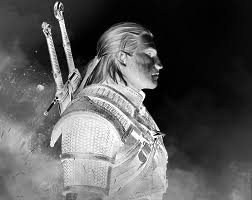

In [10]:
negative_image

In [11]:
# Save the negative image
negative_image.save("negative_image.jpg")

# 2. Gama Encoding/Correction 

In [12]:
image2 = Image.open("image2.jpeg")

In [14]:
if image2.mode == "RGB":
    image2 = image2.convert("L")

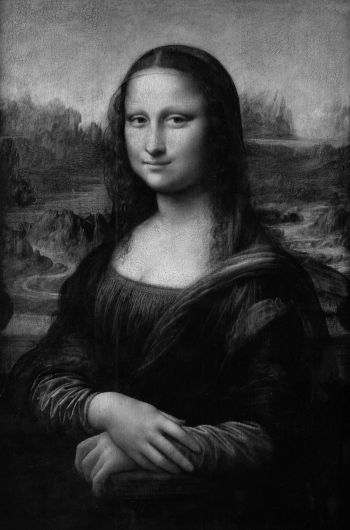

In [15]:
image2

Gamma correction or gamma is a nonlinear operation used to encode and decode luminance or tristimulus values in video or still image systems. Gamma correction is, in the simplest cases, defined by the following power-law expression:

Corrected Intensity = Original Intensity^γ

In the common case inputs and outputs are typically in the range 0–1.

A gamma value γ < 1 is sometimes called an encoding gamma, and the process of encoding with this compressive power-law nonlinearity is called gamma compression; conversely, a gamma value γ > 1 is called a decoding gamma, and the application of the expansive power-law nonlinearity is called gamma expansion.

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Gamma_correction)

In [16]:
def gamma_correction(image, gamma):
    image_array = np.array(image)
    
    corrected_image_array = np.power(image_array / 255.0, gamma) * 255.0
    
    corrected_image_array = corrected_image_array.astype(np.uint8)
    
    return Image.fromarray(corrected_image_array)

0.25

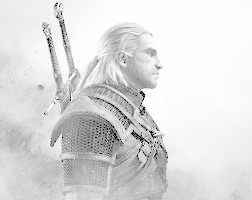

0.5

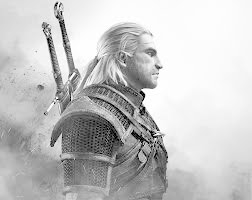

0.75

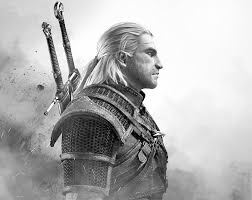

1

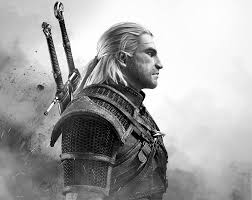

1.5

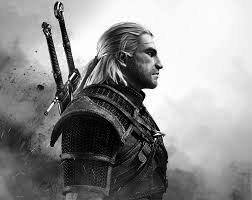

2

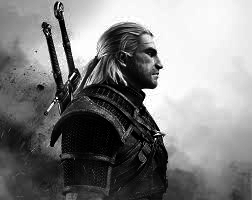

2.5

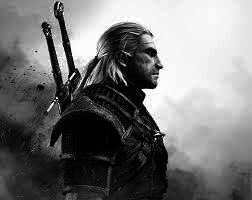

3

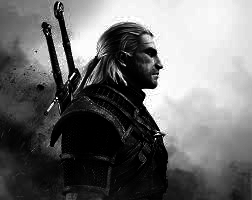

In [17]:
gamma_values = [0.25, 0.5, 0.75, 1, 1.5, 2, 2.5, 3]
for gamma in gamma_values:
    corrected_image = gamma_correction(image, gamma)
    print(gamma, end="")
    display(corrected_image)